In [1]:
import matplotlib.pyplot as plt # a module necessary to make a plot
from netCDF4 import Dataset
import numpy as np
import cartopy.crs as ccrs
import numpy.ma as ma


In [1]:
filename='NDVI2007_2015mon.nc'   # name of the file

In [4]:
# read data
f=Dataset(filename,'a')
print(f.variables.keys())
ndvi=f.variables['NDVI'][:]
lat=f.variables['lat'][:]
lon=f.variables['lon'][:]

odict_keys(['lat', 'lon', 'time', 'NDVI'])


In [11]:
# find out dimension
nx=len(lon)
ny=len(lat)
nt=len(ndvi[:,0,0])
nm=12
nyr=int(nt/nm)  # convert the values to integer
print(ndvi.shape)

(108, 180, 360)


In [7]:
# mask out negative values
ndvi=ma.masked_less(ndvi,0.)

Calculate climatology of each month

In [12]:
ndvi4=ndvi.reshape(nyr,nm,ny,nx)
print(ndvi4.shape)
ndvia=np.mean(ndvi4,axis=0)   # monthly average
print(ndvia.shape)

(9, 12, 180, 360)
(12, 180, 360)


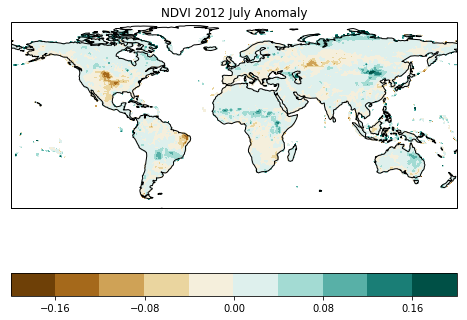

In [20]:
# Make a contour plot

# contour level
levels=np.arange(-0.2,0.21,0.04)

# color map
cmap1=plt.cm.BrBG

#map projection
proj=ccrs.PlateCarree()

# Set figure size
fig=plt.figure(figsize=(8,8))
# Define axis
ax = fig.add_subplot(1,1,1, projection=proj)

cs=ax.contourf(lon,lat,ndvi4[5,6,:,:]-ndvia[6,:,:],cmap=cmap1,levels=levels)

plt.title('NDVI 2012 July Anomaly')
plt.colorbar (cs,orientation='horizontal') # color bar

ax.coastlines()

We had a severe drought in the Midwest in 2012.

#### Exercises
Plot the anomaly for July of 2010. 

Which region did we have droughts?